In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
x_train,x_test=x_train/255.0, x_test/255.0
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [9]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)


In [11]:
model=keras.Sequential([

    # first layer : 32 filter : 3x3  ReLU activation -> POOLling 2x2              
                                                                                     
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),  
    keras.layers.MaxPooling2D(pool_size=(2,2)), 

    # sec layer : 64 filter  3x3 RELU  -> 2x2 POOL

    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    ####### optional 128 filter 2x2 pool
    # Flatten 
    keras.layers.Flatten(),
    #Fully Connected layer  128 neurons ReLU
    keras.layers.Dense(128,activation='relu'),
    #output layer 
    keras.layers.Dense(10,activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))
test_loss, test_acc=model.evaluate(x_test,y_test)
test_acc


Epoch 1/5


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1308 - accuracy: 0.9599 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0301 - val_accuracy: 0.9901
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9878


0.9878000020980835

1/1 [==============================] - 0s 25ms/step


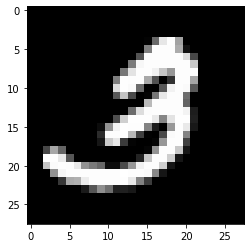

3


In [23]:
test_image = x_test[7568].reshape(1, 28, 28, 1)
predict = model.predict(test_image)
predicted_digit = np.argmax(predict)

plt.imshow(test_image[0], cmap='gray')
plt.show()
print(predicted_digit)


In [32]:
from tensorflow.keras.preprocessing import image
img=image.load_img("9.png",target_size=(28,28),color_mode='grayscale')

In [33]:
imgArray=image.img_to_array(img)
imgArray=imgArray.reshape(1,28,28,1)
imgArray =imgArray / 255.0


1/1 [==============================] - 0s 60ms/step
9


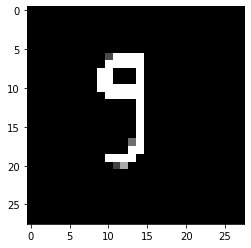

3


In [35]:
predict1=model.predict(imgArray)
predicted_digit1=np.argmax(predict1)
print(predicted_digit1)
plt.imshow(img, cmap='gray')
plt.show()
print(predicted_digit)
